# MARKET BASKET ANALYSIS WITH APRORI ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules 

In [3]:
market_data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
market_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
transactions = []
for i in range(0, 7501):
  transactions.append([str(market_data.values[i,j]) for j in range(0, 20) if str(market_data.values[i,j]) != 'nan'])

In [9]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
item_sort_df = df.sum().sort_values(ascending = False).reset_index()
item_sort_df.rename(columns={item_sort_df.columns[0]:'item_name',item_sort_df.columns[1]:'item_count'}, inplace=True)
item_sort_df.head(10)

,item_name,item_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1229
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


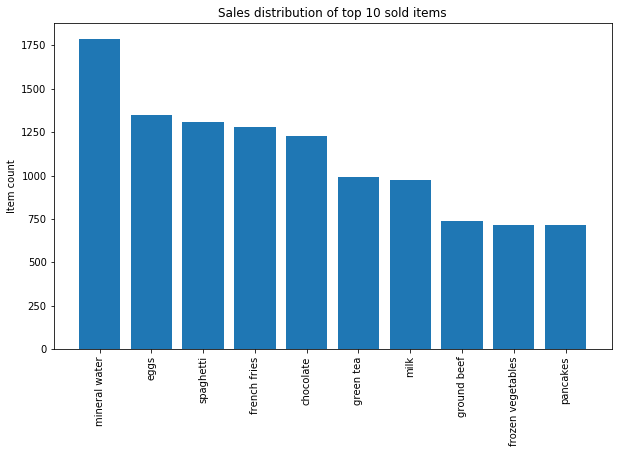

In [7]:
objects = (list(item_sort_df['item_name'].head(10)))
y = np.arange(len(objects))
count = list(item_sort_df['item_count'].head(10))
 
plt.figure(figsize=(10,6))
plt.bar(y, count, align='center')
plt.xticks(y, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Sales distribution of top 10 sold items')
plt.show()

In [8]:
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True) 
  
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.3) 
rules.sort_values('lift', ascending = False, inplace = True)
rules[(rules['lift'] > 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
55,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470
50,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
59,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
45,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
54,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
34,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468


In [9]:
len(rules[(rules['lift'] > 2)])

9

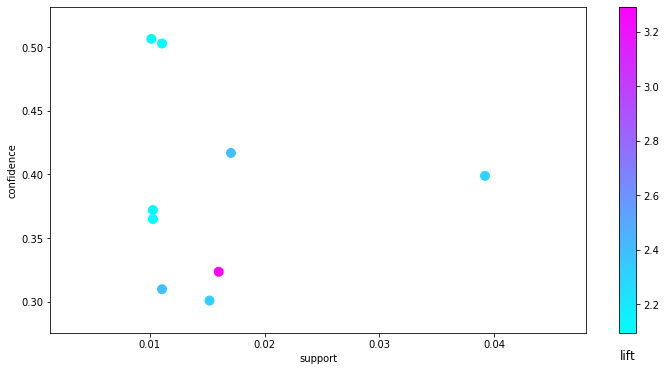

In [10]:
g = rules[(rules['lift'] > 2)]

plt.figure(figsize=(12,6))
plt.scatter(g['support'], g['confidence'], c=g['lift'], s=80, cmap='cool')
plt.colorbar().ax.set_title('lift', y=-0.1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()